# **EXPLAINABLE AI - Cats and Dogs Image Classification**
**IF4070 Representasi Pengetahuan dan Penalaran**


# Group Members:
- Ibrahim Ihsan Rasyid (13522018)
- Farhan Nafis Rayhan (13522037)
- Muhammad Syarafi Akmal (13522076)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
!mkdir -p ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Import Dataset

In [3]:
!kaggle competitions download -c praktikum-2-if-3270-ml

praktikum-2-if-3270-ml.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip praktikum-2-if-3270-ml.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/images/train/97e9ad46-53bc-48e9-a67c-6ca858c5f7f4.jpg  
  inflating: images/images/train/97ed79a1-6659-464b-8052-ff026b39be3c.jpg  
  inflating: images/images/train/97eec0f7-2a78-4977-8c7a-b2ac2c85cefe.jpg  
  inflating: images/images/train/97f07281-a7c7-4f23-9471-4e22f6b6dc35.jpg  
  inflating: images/images/train/97f2b41b-6519-4bef-894d-ca8393f33617.jpg  
  inflating: images/images/train/97f343e9-6e3e-451e-9a3e-6a87141b8a99.jpg  
  inflating: images/images/train/9804ddd7-c5ec-49cb-9ed6-1e622eb1a5ce.jpg  
  inflating: images/images/train/98072f80-d31c-4a21-803c-67f17155ba2d.jpg  
  inflating: images/images/train/980a27f4-dadc-4a57-b262-bc170667bbf5.jpg  
  inflating: images/images/train/980a99e4-888c-4982-bd48-32f8891f32e9.jpg  
  inflating: images/images/train/98138d67-ec8a-42cd-bf8d-7690e22305b8.jpg  
  inflating: images/images/train/98147999-ccb0-46c2-aebc-243bbe5322b4.jpg  
  inflating: images/images/train/9823

In [5]:
# import zipfile
# import os

# zip_path = "praktikum-2-if-3270-ml.zip"
# extract_dir = "praktikum-2-if-3270-ml"

# os.makedirs(extract_dir, exist_ok=True)

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# print("Extracted to:", extract_dir)

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.head())
print(test_df.head())

                                      Image  Species_Label
0  eceecd68-aae4-41b5-86fe-5a0b954b038e.jpg              0
1  224f5a7b-e6ad-479d-a6ae-a26812e4e038.jpg              0
2  461e8e5f-8221-441c-971a-aecfcaf05564.jpg              0
3  a62fab23-6107-46e5-aae0-7ff9bc0a2363.jpg              1
4  7e27f920-cecd-4d86-9e2a-9a667b14d787.jpg              1
                                      Image
0  865918b6-015d-4070-a18f-a6957154662b.jpg
1  c33dfd7c-2a0b-43bc-b184-ad5bc71589d1.jpg
2  28d53db6-4caf-4de9-9624-c61ecfa00c49.jpg
3  b46a6481-33a3-42e8-9bfd-9c507e3dce63.jpg
4  645d8cc3-9f63-4a5f-82a8-cc5654fca714.jpg


In [7]:
train_df['Path'] = 'images/images/train/' + train_df['Image']
test_df['Path'] = 'images/images/test/' + test_df['Image']

In [8]:
# train_df['Species_Label'] = train_df['Species_Label'].astype(int).map({0: 'cat', 1: 'dog'})

In [9]:
print(train_df)
print(test_df)

                                          Image  Species_Label  \
0      eceecd68-aae4-41b5-86fe-5a0b954b038e.jpg              0   
1      224f5a7b-e6ad-479d-a6ae-a26812e4e038.jpg              0   
2      461e8e5f-8221-441c-971a-aecfcaf05564.jpg              0   
3      a62fab23-6107-46e5-aae0-7ff9bc0a2363.jpg              1   
4      7e27f920-cecd-4d86-9e2a-9a667b14d787.jpg              1   
...                                         ...            ...   
12495  99b2ac88-cf48-4ec8-9e5f-4104a4821b81.jpg              1   
12496  1c0b09ef-a9ea-4e26-9b00-b03d65815731.jpg              0   
12497  d6bd7dc0-5bd0-4369-b715-a6408165b16c.jpg              0   
12498  b46c602b-ea24-47b4-b319-5f6eb1028ea6.jpg              1   
12499  2e36effc-bbc3-4659-bbd7-2c09a5689406.jpg              1   

                                                    Path  
0      images/images/train/eceecd68-aae4-41b5-86fe-5a...  
1      images/images/train/224f5a7b-e6ad-479d-a6ae-a2...  
2      images/images/train/461

# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis. Provide at least 2 analysis.

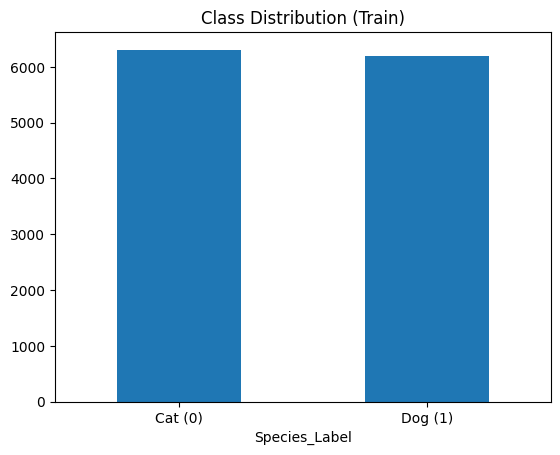

Amount of Cats: 6308
Amount of Dogs: 6192


In [10]:
value_count = train_df['Species_Label'].value_counts()
value_count.plot(kind='bar', title='Class Distribution (Train)')
plt.xticks([0, 1], ['Cat (0)', 'Dog (1)'], rotation=0)
plt.show()
print("Amount of Cats: " + str(value_count.iloc[0]))
print("Amount of Dogs: " + str(value_count.iloc[1]))

#### Data is quite well balanced between the both classes

Text(0.5, 1.0, 'Image Resolution Distribution (Sample)')

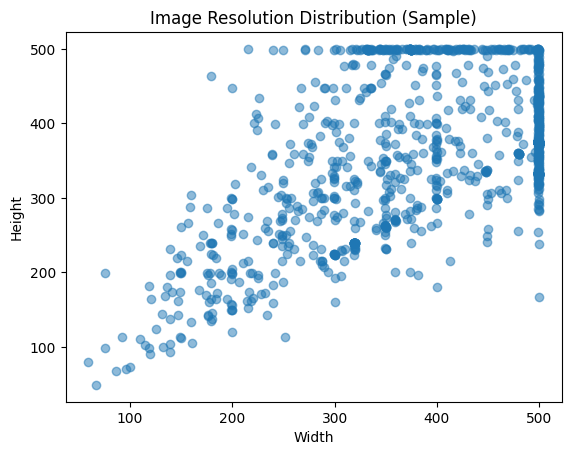

In [11]:
from PIL import Image

def get_image_dimensions(df_sample):
    widths, heights = [], []
    for filepath in df_sample['Path']:
        with Image.open(filepath) as img:
            widths.append(img.width)
            heights.append(img.height)
    return widths, heights

sample_df = train_df.sample(1250, random_state=42)
widths, heights = get_image_dimensions(sample_df)

plt.scatter(widths, heights, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Resolution Distribution (Sample)")

#### Distribution between images resolution of the first 1250 images shows mostly are over 224x224 pixels

Text(0.5, 1.0, 'Color Channels (Sample)')

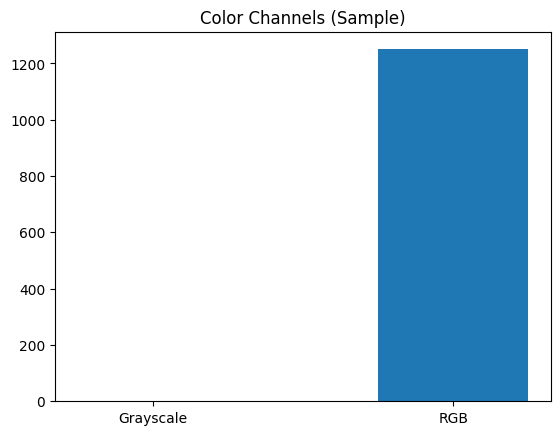

In [12]:
def check_color_channels(df_sample):
    channels = []
    for filepath in df_sample['Path']:
        img = np.array(Image.open(filepath))
        channels.append(img.shape[2] if len(img.shape) == 3 else 1)
    return channels

channels = check_color_channels(sample_df)
plt.hist(channels, bins=[0.5, 1.5, 2.5, 3.5])
plt.xticks([1, 3], ["Grayscale", "RGB"])
plt.title("Color Channels (Sample)")

#### No images are in Grayscale

In [13]:
corrupt_files = []
for idx, row in train_df.iterrows():
    filepath = row['Path']
    try:
        img = Image.open(filepath)
        img.verify()
        img.close()
    except (IOError, SyntaxError, Image.DecompressionBombError) as e:
        corrupt_files.append(filepath)
        print(f"Corrupt file detected: {filepath} - Error: {str(e)}")

print(f"Total corrupt files found: {len(corrupt_files)}")
print("Corrupt files list:", corrupt_files)

Total corrupt files found: 0
Corrupt files list: []


#### No files are Corrupt

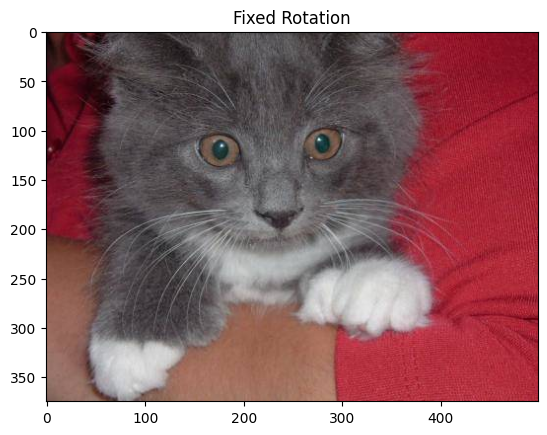

In [14]:
from PIL import ImageOps

def fix_rotation(filepath):
    try:
        img = Image.open(filepath)
        exif = img.getexif()
        if exif and exif.get(0x0112) == 3:
            img = ImageOps.rotate(img, 180)
        elif exif and exif.get(0x0112) == 6:
            img = ImageOps.rotate(img, 270)
        return img
    except:
        return None

fixed_img = fix_rotation(train_df.iloc[0]['Path'])
if fixed_img:
    plt.imshow(fixed_img)
    plt.title("Fixed Rotation")

#### Function to fix image rotations

## EDA Conclusion
We concluded that both classes are quite balanced, and there are no corrupt nor grayscale pictures in the dataset

# 2. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

In [15]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# 3. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

In [16]:
from tensorflow.keras import layers

# SOTA Augmentation pipeline (runs on GPU)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
])

In [17]:
from tensorflow.keras.applications.convnext import preprocess_input

def load_image_raw(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [384, 384])
    return img, label

def load_image_test(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [384, 384])
    return img

def create_dataset(df, batch_size=32, shuffle=False, train=False):
    image_paths = df['Path'].values

    # --- 1. Check if this is Labeled Data (Train/Val) or Test Data ---
    is_labeled = 'Species_Label' in df.columns

    if is_labeled:
        labels = df['Species_Label'].values.reshape(-1, 1)
        dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
        # Map with label
        dataset = dataset.map(load_image_raw, num_parallel_calls=tf.data.AUTOTUNE)
    else:
        # Test mode: Only paths
        dataset = tf.data.Dataset.from_tensor_slices(image_paths)
        # Map without label
        dataset = dataset.map(load_image_test, num_parallel_calls=tf.data.AUTOTUNE)

    # --- 2. Shuffling (Only for Training) ---
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(df))

    # --- 3. Batching ---
    # CRITICAL FIX: I removed the double batching from your original code.
    dataset = dataset.batch(batch_size)

    # --- 4. Augmentation & Preprocessing ---
    if train:
        # Augmentation (only works on Labeled pairs here)
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y),
                              num_parallel_calls=tf.data.AUTOTUNE)

    # Preprocessing (Normalization)
    if is_labeled:
        # Handle (Image, Label)
        dataset = dataset.map(lambda x, y: (preprocess_input(x), y),
                              num_parallel_calls=tf.data.AUTOTUNE)
    else:
        # Handle (Image) only - FOR TEST
        dataset = dataset.map(lambda x: preprocess_input(x),
                              num_parallel_calls=tf.data.AUTOTUNE)

    # --- 5. Prefetching ---
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

In [18]:
train_ds = create_dataset(pd.DataFrame(train_data), train=True)
val_ds = create_dataset(pd.DataFrame(val_data), train=False)
test_ds = create_dataset(pd.DataFrame(test_df), train=False)

# Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [19]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [20]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [21]:
# train_dataset = create_dataset(train_data, batch_size=batch_size, shuffle=True, augment=True)
# val_dataset = create_dataset(val_data, batch_size=batch_size, shuffle=False)

# train_dataset = train_generator
# val_dataset = val_generator
# test_dataset = test_datagen

# 4. Modeling and Validation

Modeling is the process of building a machine learning model to solve a particular problem, or in the context of this task, predicting each class in an image using a `Convolutional Neural Network with AlexNet Architecture`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## 4.1 Convolutional Neural Network

You need to build and compare two models:
- Build your own model with AlexNet architecture using PyTorch/Tensorflow.
- Fine-tune a pretrained model (huggingface/roboflow)


### 4.1.1 Build Your Own Model

Convolutional Neural Network (CNN) is a type of artificial neural network specifically designed to process data that has a grid-like structure, such as images or digital pictures. AlexNet is one of the well-known CNN architectures due to its success in winning the ImageNet competition in 2012. AlexNet consists of several convolutional layers accompanied by pooling layers and fully connected layers, and it uses the ReLU activation function. Try to create your own CNN model with AlexNet architecture using PyTorch/Tensorflow.

In [22]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow.keras.backend as K

In [23]:
# def macro_soft_f1_loss(y_true, y_pred):
#     """
#     A differentiable loss function that approximates Macro F1.
#     """
#     y_true = tf.cast(y_true, tf.float32)

#     # TP, FP, FN calculation
#     tp = K.sum(y_true * y_pred)
#     fp = K.sum((1 - y_true) * y_pred)
#     fn = K.sum(y_true * (1 - y_pred))

#     # Soft F1 for the positive class
#     f1_pos = 2 * tp / (2 * tp + fp + fn + K.epsilon())

#     # Soft F1 for the negative class (invert labels)
#     y_true_neg = 1 - y_true
#     y_pred_neg = 1 - y_pred
#     tp_neg = K.sum(y_true_neg * y_pred_neg)
#     fp_neg = K.sum((1 - y_true_neg) * y_pred_neg)
#     fn_neg = K.sum(y_true_neg * (1 - y_pred_neg))

#     f1_neg = 2 * tp_neg / (2 * tp_neg + fp_neg + fn_neg + K.epsilon())

#     # Macro F1 is the average of both
#     macro_f1 = (f1_pos + f1_neg) / 2.0

#     # Return 1 - Macro_F1 so the optimizer can minimize it
#     return 1 - macro_f1

In [26]:
def build_convnext_model(input_shape=(384, 384, 3)):
    # 1. Instantiate the base model
    # include_top=False removes the 1000-class classification layer
    base_model = ConvNeXtBase(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        include_preprocessing=False # We did preprocessing in the data pipeline
    )

    # 2. Freeze base model (optional, but recommended for initial fine-tuning)
    base_model.trainable = False

    # 3. Build the head
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False) # training=False keeps BatchNormalization locked
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.LayerNormalization()(x) # ConvNeXt papers often use LayerNorm instead of BatchNorm in the head
    x = tf.keras.layers.Dense(256, activation='gelu')(x) # GELU is preferred for modern architectures
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs, outputs, name="ConvNeXt_Binary")
    return model

model = build_convnext_model()

optimizer = tf.keras.optimizers.AdamW(
    learning_rate=1e-4,
    weight_decay=0.05,
    beta_1=0.9,
    beta_2=0.999
)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1),
    optimizer=optimizer,
    metrics=[tf.keras.metrics.F1Score(name='f1_score', average='macro', threshold=0.5)]
)

model.summary()

callbacks = [
    EarlyStopping(
        monitor='val_loss',     # Watch the validation loss
        patience=5,             # "How many epochs to wait before quitting?"
        restore_best_weights=True, # IMPORTANT: Revert to the best epoch's weights
        verbose=1
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="convnext_model.keras",
        save_best_only=True,
        monitor="val_loss",
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,             # Cut LR in half
        patience=2,             # If no improvement for 2 epochs
        min_lr=1e-6,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    epochs=25,
    validation_data=val_ds,
    callbacks=callbacks
)

Model: "ConvNeXt_Binary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 384, 384, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convnext_base (Functional)      │ (None, 12, 12, 1024)   │    87,566,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_3           │ (None, 1024)           │         2,048 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,831,169 (335.05 MB)

 Trainable params: 264,705 (1.01 MB)

 Non-trainable params: 87,566,464 (334.04 MB)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - f1_score: 0.7677 - loss: 0.5196
Epoch 1: val_loss improved from inf to 0.30586, saving model to convnext_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 698s 2s/step - f1_score: 0.7679 - loss: 0.5194 - val_f1_score: 0.9482 - val_loss: 0.3059 - learning_rate: 1.0000e-04
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - f1_score: 0.8873 - loss: 0.3875
Epoch 2: val_loss improved from 0.30586 to 0.28490, saving model to convnext_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 592s 2s/step - f1_score: 0.8873 - loss: 0.3874 - val_f1_score: 0.9568 - val_loss: 0.2849 - learning_rate: 1.0000e-04
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - f1_score: 0.8945 - loss: 0.3742
Epoch 3: val_loss improved from 0.28490 to 0.28465, saving model to convnext_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 601s 2s/step - f1_score: 0.8945 - loss: 0.3742 - val_f1_score: 0.9579 - val_loss: 0.2846 - learning_rate: 1.0000e-04
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [27]:
model.save("convnet_model.h5")

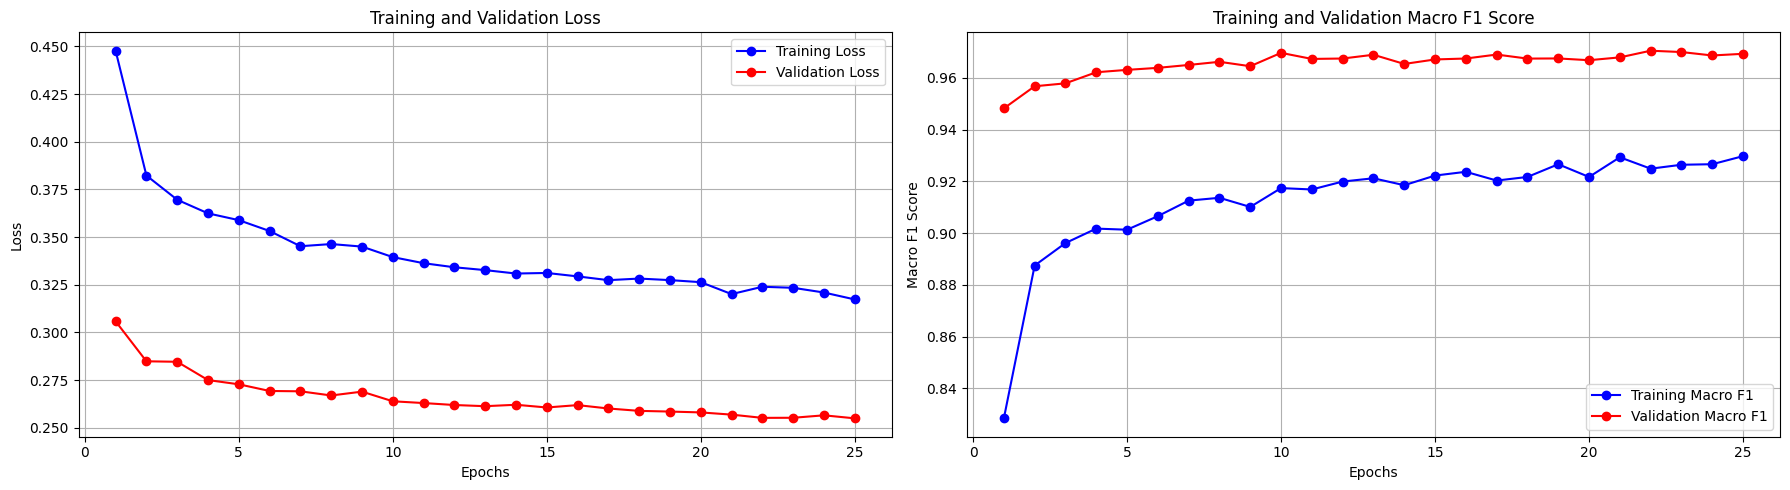

In [28]:
import matplotlib.pyplot as plt

# 1. Extract data from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Robust check for F1 key name
# Depending on how you compiled, it might be 'f1_score', 'macro_f1', etc.
keys = history.history.keys()
f1_key = next((k for k in keys if 'f1' in k and 'val' not in k), None)
val_f1_key = next((k for k in keys if 'f1' in k and 'val' in k), None)

if f1_key:
    train_f1 = history.history[f1_key]
    val_f1 = history.history[val_f1_key]
else:
    print("Warning: F1 Score metric not found in history. Did you add it to metrics=[]?")
    train_f1 = [0] * len(train_loss) # Dummy data to prevent crash
    val_f1 = [0] * len(val_loss)

epochs = range(1, len(train_loss) + 1)

# 2. Plotting
plt.figure(figsize=(18, 5)) # Made slightly wider for better visibility

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot Macro F1
plt.subplot(1, 2, 2)
plt.plot(epochs, train_f1, 'bo-', label='Training Macro F1')
plt.plot(epochs, val_f1, 'ro-', label='Validation Macro F1')
plt.title('Training and Validation Macro F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Macro F1 Score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
import numpy as np
from sklearn.metrics import f1_score

print("--- Optimizing Threshold ---")

# 1. Get raw probabilities from the VALIDATION set
# Note: Ensure val_ds is not shuffled if you are extracting labels manually,
# or iterate carefully to match preds with labels.
val_probs = model.predict(val_ds)

# 2. Get the true labels from the validation set
# (This extraction depends on how your 'val_ds' is built.
# If it's a tf.data.Dataset, we need to unbatch it to get labels)
val_labels = []
for img, label in val_ds:
    val_labels.extend(label.numpy())
val_labels = np.array(val_labels)

# 3. Test thresholds from 0.01 to 0.99
thresholds = np.arange(0.01, 0.99, 0.01)
best_f1 = 0
best_thresh = 0.5

for t in thresholds:
    # Convert probabilities to 0 or 1 based on current threshold 't'
    preds = (val_probs > t).astype(int)

    # Calculate Macro F1
    score = f1_score(val_labels, preds, average='macro')

    if score > best_f1:
        best_f1 = score
        best_thresh = t

print(f"\nOptimization Complete:")
print(f"Default (0.5) F1: {f1_score(val_labels, (val_probs > 0.5).astype(int), average='macro'):.4f}")
print(f"Best Threshold:   {best_thresh:.2f}")
print(f"Max Validation F1:{best_f1:.4f}")

--- Optimizing Threshold ---
79/79 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step

Optimization Complete:
Default (0.5) F1: 0.9696
Best Threshold:   0.51
Max Validation F1:0.9708


In [30]:
predictions = model.predict(test_ds, verbose=1)
predicted_labels = (predictions > best_thresh).astype(int).flatten()

submission_df = pd.DataFrame({
    "Image": test_df['Image'],
    "Species_Label": predicted_labels
})

submission_df.to_csv("submission_convnet.csv", index=False)

391/391 ━━━━━━━━━━━━━━━━━━━━ 404s 1s/step


ValueError: Per-column arrays must each be 1-dimensional

In [36]:
model_shell = build_convnext_model()

# 2. Load the weights from the .h5 file into the shell
model_shell.load_weights("convnet_model.h5")

print("Weights loaded successfully!")

model_shell.summary()

Weights loaded successfully!


Model: "ConvNeXt_Binary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 384, 384, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convnext_base (Functional)      │ (None, 12, 12, 1024)   │    87,566,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_7           │ (None, 1024)           │         2,048 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,831,169 (335.05 MB)

 Trainable params: 264,705 (1.01 MB)

 Non-trainable params: 87,566,464 (334.04 MB)